In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pysimul
from math import *
π = np.pi

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
simul = pysimul.PySimul()
simul['T'] = T = 10
simul['gamma'] = gamma = 500
D = T / gamma
simul['part_m'] = part_m = 0.1
simul['reset_rate'] = α = 100

In [54]:
simul.end()

In [55]:
simul.start()

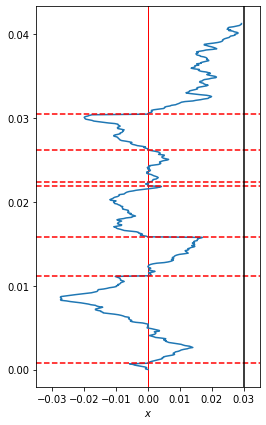

In [60]:
simul['pause'] = 1

plt.figure(figsize=(4,7))
t = simul['sample_t']
x = simul['part_x'] - 0.5
reset_times = simul['reset_times']
N = 0
while x[N] < 0.03:
    N += 1
reset_times = reset_times[ reset_times < t[N] ]
plt.axvline(x=0, lw=1, color='red')
plt.plot(x[:N], t[:N])
for t in reset_times:
    plt.axhline(y=t, linestyle='--', color='red')
plt.axvline(x=0.03, color='black')
plt.xlim((-0.035,0.035))
plt.xlabel("$x$")
plt.savefig("langevin-reset-traj.pdf")